In [55]:
import cobra
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
from matplotlib import pyplot as plt
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal

In [57]:
model = cobra.io.read_sbml_model("Arnold2014_WT_Cntl_Loopless_Cyclic_NP_Nmax.xml")
samples_control = pd.read_csv('ResultsCHRR_ANmodel_Col0_Control_Loopless_Cyclic_NP_Nmax_10000.csv',header=None)
samples_cold = pd.read_csv('ResultsCHRR_ANmodel_Col0_Cold_Loopless_Cyclic_NP_Nmax_10000.csv',header=None)
samples_fum_control = pd.read_csv('ResultsCHRR_ANmodel_Fum2_Control_Loopless_Cyclic_NP_Nmax_10000.csv',header=None)
samples_fum_cold = pd.read_csv('ResultsCHRR_ANmodel_Fum2_Cold_Loopless_Cyclic_NP_Nmax_10000.csv',header=None)

cobra/core/reaction.py:394 UserWarning: malformed gene_reaction_rule '2*(ATCG00020 and ATCG00680 and ATCG00280 and ATCG00270 and ATCG00580 and ATCG00570 and ATCG00710 and ATCG00080 and ATCG00550 and ATCG00070 and ATCG00560 and ATCG00220 and ATCG00700 and (AT5G66570 or AT3G50820) and AT1G06680 and (AT4G21280 or AT4G05180) and AT1G79040 and AT1G44575 and ATCG00690 and AT3G21055 and AT2G30570 and AT2G06520 and AT1G67740 and ATCG00300)' for <Reaction PSII_h at 0x7fef2dc1abd0>
cobra/core/reaction.py:394 UserWarning: malformed gene_reaction_rule '2*(ATCG00540 and ATCG00720 and AT4G03280 and ATCG00730 and ATCG00600 and ATCG00590 and AT2G26500 and ATCG00210)' for <Reaction Cytb6f_h at 0x7fef2dc1a850>
cobra/core/reaction.py:394 UserWarning: malformed gene_reaction_rule '8*(ATCG00490) and 8*(AT5G38430 or AT5G38420 or AT1G67090 or AT5G38410)' for <Reaction RBC_h at 0x7fef2dc1a310>
cobra/core/reaction.py:394 UserWarning: malformed gene_reaction_rule '4*(AT3G26650 or AT1G12900) or (2*(AT3G26650 or 

In [58]:
def input_output_reacs(model):
    "Prints all input and output reactions for the given model"
    reacs = []
    nums = []
    counter = 0
    for r in model.reactions:
        coeffs = []
        for i in r.metabolites:
            c = r.get_coefficient(i.id)
            coeffs.append(c)
        if all(i > 0.0 for i in coeffs) or all(i < 0.0 for i in coeffs) :
            reacs.append(r)
            print(r)
            nums.append(counter)
        counter = counter + 1
    return(reacs)

def single_fig(i,xmin,xmax):
    col0 = pd.Series.tolist(samples_control.iloc[:,i])
    col0_cold = pd.Series.tolist(samples_cold.iloc[:,i])
    fum2 = pd.Series.tolist(samples_fum_control.iloc[:,i])
    fum2_cold = pd.Series.tolist(samples_fum_cold.iloc[:,i])
    bns = 100
    weights_x = np.ones_like(col0)/float(len(col0))
    weights_y = np.ones_like(col0_cold)/float(len(col0_cold))
    weights_x_fum = np.ones_like(fum2)/float(len(fum2))
    weights_y_fum = np.ones_like(fum2_cold)/float(len(fum2_cold))
    yn, ybins, ypatches = axis1.hist(fum2_cold, bins=bns, alpha=0.5, weights=weights_y, color = "cyan", lw=0)
    xn, xbins, xpatches = axis1.hist(col0, bins=bns,alpha=0.5, weights=weights_x, color = "red", lw=0)
    yn, ybins, ypatches = axis1.hist(col0_cold, bins=bns, alpha=0.5, weights=weights_y, color = "blue", lw=0)
    xn, xbins, xpatches = axis1.hist(fum2, bins=bns, alpha=0.5, weights=weights_x, color = "pink", lw=0)
    plt.xlabel('Flux',fontsize=20)
    plt.ylabel('Frequency',fontsize=20)
    plt.title('{}'.format(model.reactions[i].reaction),color="black",fontsize=12,y=0.9)
    plt.ylim((0,0.04))
    plt.xlim((xmin,xmax))
    plt.tick_params(labelsize=20)

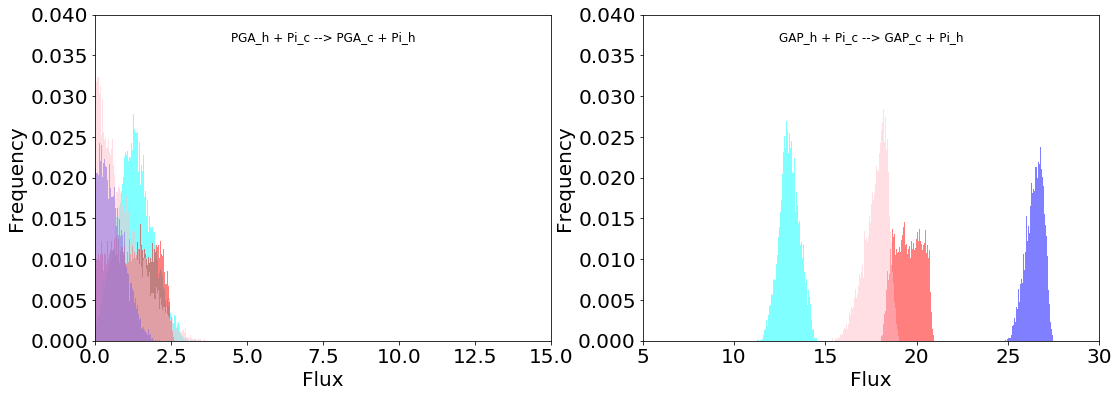

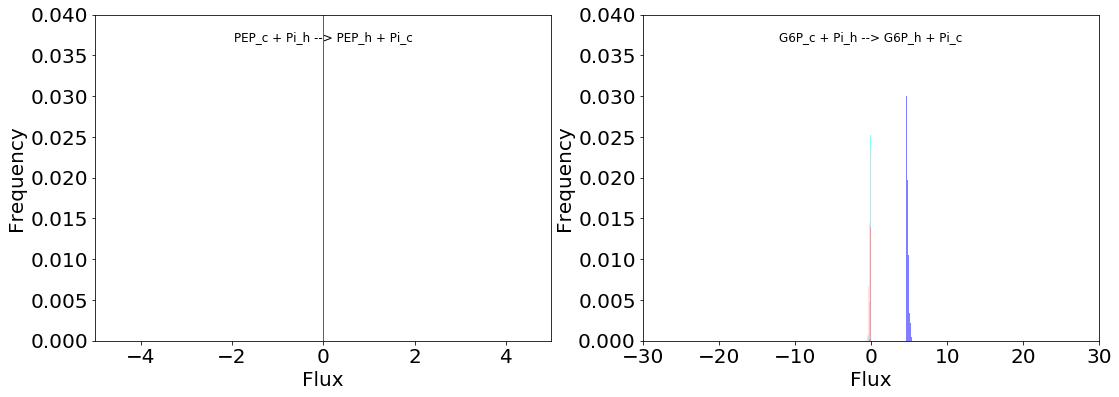

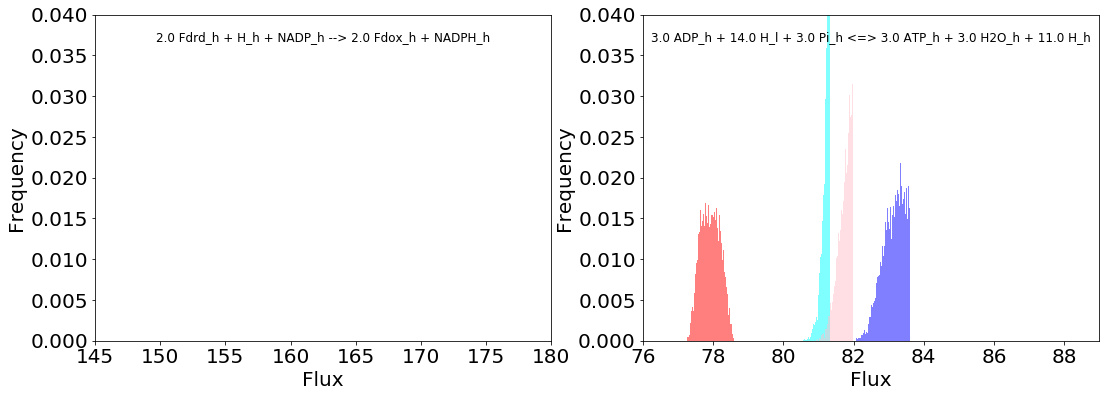

In [59]:
# # Plotting the TPT reactions 
fig = plt.figure(figsize=(18,6))
axis1 = fig.add_subplot(121)
single_fig(329,0,15) 
axis1 = fig.add_subplot(122)
single_fig(330,5,30)
#fig.savefig('Loopless_PGA_GAP.png')

# # Plotting the PEP and G6P reactions 
fig = plt.figure(figsize=(18,6))
axis1 = fig.add_subplot(121)
single_fig(332,-5,5)
axis1 = fig.add_subplot(122)
single_fig(335,-30,30)
#fig.savefig('Loopless_PGA_GAP.png')

# Plotting the ATP/NADPH reactions 
fig = plt.figure(figsize=(18,6))
axis1 = fig.add_subplot(121)
single_fig(3,145,180)
axis1 = fig.add_subplot(122)
single_fig(4,76,89)
#fig.savefig('Loopless_ATP_NADPH.png')


In [32]:
# Pulling out all reactions that transport from the cytosol to the chloroplast 
for r in model.reactions:
    ok = []
    for m in r.reactants:
        if "_c" in str(m):
                ok.append("r")
    for p in r.products:
        if "_h" in str(m):
                ok.append("s")
    if "s" in ok and "r" in ok:
        print(r)
#         print(r.genes)
for r in model.reactions:
    ok = []
    for m in r.reactants:
        if "_h" in str(m):
                ok.append("r")
    for p in r.products:
        if "_c" in str(m):
                ok.append("s")
    if "s" in ok and "r" in ok:
        print(r)
#         print(r.genes)
            

Tr_NTT: ADP_h + ATP_c + Pi_h --> ADP_c + ATP_h + Pi_c
Tr_NDT1: AMP_h + NAD_c <=> AMP_c + NAD_h
Tr_NDT2: ADP_h + NAD_c <=> ADP_c + NAD_h
Tr_TPT3: DHAP_h + Pi_c --> DHAP_c + Pi_h
Tr_DIT1: KG_c + Mal_h --> KG_h + Mal_c
Tr_TPT1: PGA_h + Pi_c --> PGA_c + Pi_h
Tr_TPT2: GAP_h + Pi_c --> GAP_c + Pi_h
Tr_PPT: PEP_c + Pi_h --> PEP_h + Pi_c
Tr_GPT1: G6P_c + Pi_h <=> G6P_h + Pi_c
Tr_DIT2: Glu_h + Mal_c --> Glu_c + Mal_h
Bio_CLim: 0.58559 ATP_c + 207.46087 Ala_c + 64.19766 Arg_c + 61.82037 Asn_c + 90.68407 Asp_c + 0.49638 CTP_c + 27.91206 Cys_c + 14.77415 Frc_c + 77.58391 Fum_m + 0.15305 GABA_c + 0.40478 GTP_c + 33.84942 Glc_c + 45.7267 Gln_c + 103.37619 Glu_c + 245.76971 Gly_c + 29.81972 His_c + 80.57171 Ile_c + 142.42163 Leu_c + 92.89756 Lys_c + 779.97036 M_DASH_ACP_h + 38.11199 Mal_m + 2.27742 Mas_c + 30.37981 Met_c + 14.60727 Orn_h + 59.65081 Phe_c + 96.88322 Pro_c + 0.31189 SA_h + 1.30199 SCA_m + 132.78221 Ser_c + 45.39823 Suc_c + 125.42878 Thr_c + 1.15818 Tre_c + 15.08586 Trp_c + 42.33459 Tyr

In [33]:
# Comparing ATP to NADPH ratio 
WTcld = []
WTcntr = []
Mcld = []
Mcntr = []
for i in range(samples_control.shape[0]):
    col0_3 = samples_control.iloc[i,3]
    col0_cold_3 = samples_cold.iloc[i,3]
    fum2_3 = samples_fum_control.iloc[i,3]
    fum2_cold_3 = samples_fum_cold.iloc[i,3]
    col0_4 = samples_control.iloc[i,4]
    col0_cold_4 = samples_cold.iloc[i,4]
    fum2_4 = samples_fum_control.iloc[i,4]
    fum2_cold_4 = samples_fum_cold.iloc[i,4]
    WTcld.append(col0_cold_4/col0_cold_3)
    WTcntr.append(col0_4/col0_3)
    Mcld.append(fum2_cold_4/col0_cold_3)
    Mcntr.append(fum2_4/col0_3)
print(np.mean(WTcntr))
print(np.mean(WTcld))
print(np.mean(Mcntr))
print(np.mean(Mcld))

0.7279059324200085
0.9261939294408836
0.7488002988697376
0.9025407199623942


In [34]:
# Marking the constrained reactions in red:
constr = ['Mal_Store','Fum_Store','Starch_Store','Im_CO2','Fd_DASH_NADPR_h','ATPase_h',
         'GluSeADH_h', 'SADH_h', 'RibK_h', 'Cysase_c', 'DPE12_h', 'AlaTA_m', 'ADNK_c', 
          'iCitDHNADP_m', 'MalDH1_h', 'CHRS_h', 'iCitDHNADP_c', 'TA_h', 'StP1_h', 'GPAT_h', 
          'PyrPiDK_h', 'HSerK_h', 'GCEADH_p', 'DHADA1_h', 'ACoAS_h', 'MalDH3_h', 'MalDH1_p', 
          'GluK_c', 'AlaTA_h', 'GluSNAD_h', '6PGDHNAD_h', 'KARI4_h', 'P5CDHNAD_h', 'MalDH3_m', 
          'GAPDH3_c', 'AGluPR_h', 'StP21_c', 'KARI2_h', 'P5CDHNADP_m', 'ACPM_h', 'PAICARPI_h', 
          'SO3R_h', 'CitS_h', 'PSerAT_h', 'HEXK_c', 'AOrnAGluAcT_h', '6PGDHNADP_h', 'KARI3_h', 
          'GCEADH_h', 'ForDH_h', 'DAHPS_h', 'FGAMS_h', 'GluK_m', 'ForTHFL_h', 'GluSFd_h', 
          'GluSeADH_m', 'PRAGlyL_h', 'DHQS_h', 'DHQDH_h', 'DPE2_c', 'ANTPRT_h', 'IGPS_h', 
          'P5CDHNAD_m', '3IPMDH_h', 'GluK_h', 'IndGPS_h', 'PGM_c', 'GluSeADH_c', 'ArgSCAS_h', 
          'PPiase_h', 'MalDH1_m', 'CBPS_h', 'KARI1_h', 'DPE11_h', 'DHODH_m', 'DHOase_h', 'OMPDC_c', 
          'DHADA2_h', 'Glnase_c', 'AspCT_h', 'cACNHA_h', 'orOPRT_c', 'cACNDHA_h', 'GGAT_h', 
          'ArgSCAL_h', 'DPE13_h', 'GGAT_p', 'OrnCMT_h', 'AOrnTA_h', 'FGAMCL_h', 'GluSNADP_h', 
          'PGM_h', 'UGPase_c', 'IMPCH_h', 'AlaTA_p', 'AspAT_h', 'SAICARS_h', 'AspAT_m', 'AspAT_p', 
          'NO2R_h', 'PGAK_c', 'PGAK_h', 'MalDH3_c', 'AICARFT_h', 'AMT_m', 'CTHS_h', 'GMPS_c']

In [35]:
# Generate sample distribution in PDF file for all model reactions
totaldiff = []
pdf = matplotlib.backends.backend_pdf.PdfPages("AllComparisons_Loopless_Rmax.pdf") #_Pathway
for i in range(samples_control.shape[1]): 
    #[3,4,5,6,7,8,33,331,56,57,58,61,54,53,114,164,329,55,56,330,334,51,340]:
    col0 = pd.Series.tolist(samples_control.iloc[:,i])
    col0_cold = pd.Series.tolist(samples_cold.iloc[:,i])
    fum2 = pd.Series.tolist(samples_fum_control.iloc[:,i])
    fum2_cold = pd.Series.tolist(samples_fum_cold.iloc[:,i])
    #stat, p = kruskal(col0,col0_cold,fum2,fum2_cold)
    #if p<0.001: #Then samples are from different distributions 
    totaldiff.append(i)
    bns = 50
    weights_x = np.ones_like(col0)/float(len(col0))
    weights_y = np.ones_like(col0_cold)/float(len(col0_cold))
    weights_x_fum = np.ones_like(fum2)/float(len(fum2))
    weights_y_fum = np.ones_like(fum2_cold)/float(len(fum2_cold))
    yn, ybins, ypatches = plt.hist(fum2_cold, bins=bns, alpha=0.6, weights=weights_y, color = "cyan", lw=0)
    xn, xbins, xpatches = plt.hist(col0, bins=bns, alpha=0.6, weights=weights_x, color = "red", lw=0)
    yn, ybins, ypatches = plt.hist(col0_cold, bins=bns, alpha=0.6, weights=weights_y, color = "blue", lw=0)
    xn, xbins, xpatches = plt.hist(fum2, bins=bns, alpha=0.6, weights=weights_x, color = "pink", lw=0)
    plt.xlabel('Flux')
    plt.ylabel('Frequency')
    plt.ylim((0,0.05))
    gs = model.reactions[i].genes
    gene_names = []
    for g in gs:
        gene_names.append(g.id)
    if model.reactions[i].id in constr:
        plt.title('{} : {} \n{}'.format(i,model.reactions[i].reaction,gene_names),color="red",fontsize=8)
    else:
        plt.title('{} : {} \n{}'.format(i,model.reactions[i].reaction,gene_names),fontsize=6)
    pdf.savefig()
    plt.close()
pdf.close()
print(len(totaldiff))
print(samples_control.shape)

552
(10000, 552)
